# Redes neuronales en Keras

## Precarga de los datos en Keras

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# helps us to represent our data as lists easily and quickly
import numpy as np
# framework for defining a neural network as a set of Sequential layers
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

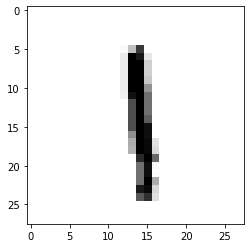

In [3]:
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [4]:
# Ver la etiqueta
print(y_train[8])

1


In [5]:
print(x_train.ndim)

3


In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
print(x_train.dtype)

uint8


In [8]:
my_slice = x_train[0:100,:]
print(my_slice.shape)

(100, 28, 28)


In [9]:
my_slice = x_train[:,7:-7,7:-7]
print(my_slice.shape)

(60000, 14, 14)


## Preprocesado de datos de entrada en una red neuronal

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

In [11]:
x_train_rs = x_train.reshape(60000,784)
x_test_rs = x_test.reshape(10000,784)

In [12]:
print(x_train_rs.shape)
print(x_test_rs.shape)

(60000, 784)
(10000, 784)


In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
print(y_test[0])

7


In [15]:
print(y_train.shape)

(60000,)


In [16]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [17]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [18]:
print(y_train.shape)

(60000, 10)


## Definición del modelo

In [19]:
model = tf.keras.models.Sequential()

In [20]:
model.add(keras.layers.Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


### Configuración del proceso de aprendizaje

In [22]:
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

## Entrenamiento del modelo

In [23]:
model.fit(x_train_rs, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 1.8759 - accuracy: 0.5527
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 1.2702 - accuracy: 0.7480
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.9572 - accuracy: 0.8048
Epoch 4/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.7798 - accuracy: 0.8329
Epoch 5/5
60000/60000 [==============================] - 2s 42us/sample - loss: 0.6697 - accuracy: 0.8511


## Evaluación del modelo

In [24]:
%%capture
test_loss, test_acc = model.evaluate(x_test_rs, y_test);

In [25]:
print('Test accuracy: ', test_acc)

Test accuracy:  0.8654


### Generación de predicciones

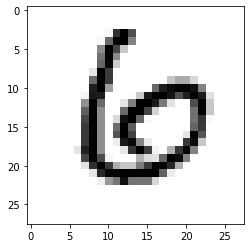

In [27]:
plt.imshow(x_test[11], cmap=plt.cm.binary)

In [28]:
predictions = model.predict(x_test_rs)

In [29]:
np.argmax(predictions[11])

6

In [31]:
print(predictions[11])

[0.07761043 0.05862939 0.13133457 0.02126942 0.13478959 0.01600268
 0.46193558 0.00578752 0.07537398 0.01726676]


In [32]:
np.sum(predictions[11])

0.99999994